# **Import libraries and get CSV file from google drive**

In [ ]:
# importing packages
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import plotly.offline as py
import statsmodels.api as sm
import plotly.graph_objs as go
import seaborn as sns
import altair as alt

In [2]:
from google.colab import drive
drive.mount('/gdrive') 

Mounted at /gdrive


In [3]:
df = pd.read_csv('/gdrive/MyDrive/Speed_Dating_Data.csv', encoding="ISO-8859-1")      # home computer
# df = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/Speed Dating Data.csv', encoding="ISO-8859-1")      # from scu google drive
df.head() 

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


# **Mapping - Change numbers to their equvalent names, ie 0=female, 1=male; ...etc**

In [4]:
mapping = {1: 'black', 2: 'white', 3: 'latino', 4:'asian', 5:'native_american', 6:'other'}  
mapping1 = {0: 'female', 1: 'male'}  
mapping2 = {0: 'No', 1:'Yes'}                   
df = df.replace({'race_o': mapping, 'race_o': mapping})                                                      # change numeric values for race to race type for one's 'partner'
df = df.replace({'race': mapping, 'race': mapping})
df = df.replace({'gender': mapping1, 'gender': mapping1})                                                    # change [0 1] to string [female male]
df

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,female,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,white,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,asian,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,female,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,white,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,asian,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,female,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,asian,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,asian,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,female,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,white,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,asian,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,female,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,latino,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,asian,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,male,44,2,21,22,14,10.0,5,18,526.0,0,0.64,0,26.0,latino,10.0,10.0,30.0,20.0,10.0,15.0,1,10.0,5.0,3.0,2.0,6.0,5.0,6.0,1.0,NaN,25.0,Climate Dynamics,18.0,"Ecole Normale Suprieure, Paris",NaN,NaN,white,...,7.0,2.0,0.0,0.0,NaN,1.0,70.0,0.0,20.0,10.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,80.0,0.0,10.0,0.0,0.0,10.0,50.0,5.0,10.0,20.0,10.0,5.0,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,male,44,2,21,22,13,10.0,4,19,527.0,0,0.71,0,24.0,other,50.0,20.0,10.0,5.0,10.0,5.0,0,6.0,3.0,7.0,3.0,7.0,2.0,2.0,2.0,2.0,25.0,Climate Dynamics,18.0,"Ecole Normale Suprieure, Paris",NaN,NaN,white,...,7.0,2.0,0.0,0.0,NaN,1.0,70.0,0.0,20.0,10.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,80.0,0.0,10.0,0.0,0.0,10.0,50.0,5.0,10.0,20.0,10.0,5.0,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,male,44,2,21,22,19,10.0,10,20,528.0,0,-0.46,0,29.0,latino,40.0,10.0,30.0,10.0,10.0,NaN,0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,25.0,Climate Dynamics,18.0,"Ecole Normale Suprieure, Paris",NaN,NaN,white,...,7.0,2.0,0.0,0.0,NaN,1.0,70.0,0.0,20.0,10.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,80.0,0.0,10.0,0.0,0.0,10.0,50.0,5.0,10.0,20.0,10.0,5.0,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,male,44,2,21,22,3,10.0,16,21,529.0,0,0.62,0,22.0,asian,10.0,25.0,25.0,10.0,10.0,20.0,1,5.0,7.0,5.0,5.0,3.0,6.0,6.0,4.0,2.0,25.0,Climate Dynamics,18.0,"Ecole Normale Suprieure, Paris",NaN,NaN,white,...,7.0,2.0,0.0,0.0,NaN,1.0,70.0,0.0,20.0,10.0,0.0

In [ ]:
df['fun_o'].value_counts(normalize=True)
df.count()

In [5]:
df_unique = df.drop_duplicates(subset = ["iid"])  # subset for each individual person
df_unique.head()
# df_unique.to_csv('df_unique.csv')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,female,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,white,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,asian,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
10,2,2.0,female,3,1,1,10,3,NaN,10,1,11.0,0,0.29,1,27.0,white,35.0,20.0,20.0,20.0,0.0,5.0,0,8.0,7.0,6.0,9.0,7.0,4.0,7.0,2.0,2.0,24.0,law,1.0,NaN,NaN,NaN,white,...,NaN,0.0,0.0,0.0,NaN,NaN,30.0,5.0,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
20,3,3.0,female,5,1,1,10,9,NaN,6,1,11.0,0,-0.24,1,27.0,white,35.0,20.0,20.0,20.0,0.0,5.0,0,7.0,8.0,6.0,5.0,8.0,4.0,5.0,2.0,1.0,25.0,Economics,2.0,NaN,NaN,NaN,white,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,4,4.0,female,7,1,1,10,6,NaN,3,1,11.0,0,-0.18,1,27.0,white,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,7.0,8.0,7.0,7.0,5.0,6.0,3.0,2.0,23.0,Law,1.0,NaN,NaN,NaN,white,...,NaN,0.0,0.0,0.0,NaN,NaN,20.0,20.0,20.0,20.0,0.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0,6.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN
40,5,5.0,female,9,1,1,10,4,NaN,1,1,11.0,0,-0.43,1,27.0,white,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,7.0,6.0,6.0,5.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,white,...,NaN,0.0,0.0,0.0,NaN,NaN,30.0,10.0,20.0,20.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,10.0,6.0,10.0,NaN,NaN,NaN,NaN,NaN


# **Age Distribution**

Text(0.5, 1.0, 'Age Distribution of Participants')

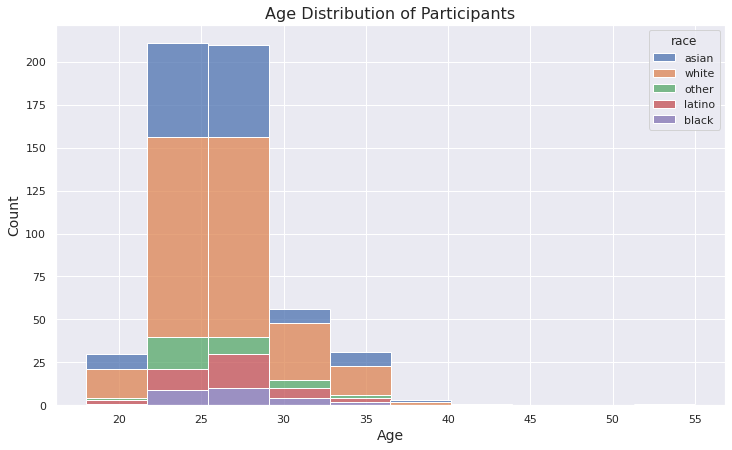

In [223]:
sns.set(rc={ 'figure.facecolor':'white'}) 
fig, ax = plt.subplots(figsize=(12,7))
g = sns.histplot(df_unique, x="age", hue='race', bins=10, multiple='stack', ax=ax)
ax.set_xlabel("Age", size=14)
ax.set_ylabel("Count", size=14)
ax.set_title('Age Distribution of Participants', size=16)

# **Income and SAT histograms - 2 plots**

In [ ]:
dz = df_unique
dz1 = dz.dropna(subset=['income'])                                          # remove decimal points and commas in numbers and cast to int
dz1['income'] = dz1['income'].astype(str).replace('\.00', '', regex=True)   # dz1 used for the income distribution plot
dz1['income'] = dz1['income'].astype(str).replace('\,', '', regex=True)
dz1[('income')].astype(int)

dsat = dz.dropna(subset=['mn_sat'])                                         # dsat used for the mean SAT scores distribution
dsat['mn_sat'] = dsat['mn_sat'].astype(str).replace('\.00', '', regex=True)
dsat['mn_sat'] = dsat['mn_sat'].astype(str).replace('\,', '', regex=True)
dsat[('mn_sat')].astype(int)
# dz1.to_csv('file2.csv') 

In [ ]:
dsat.head()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



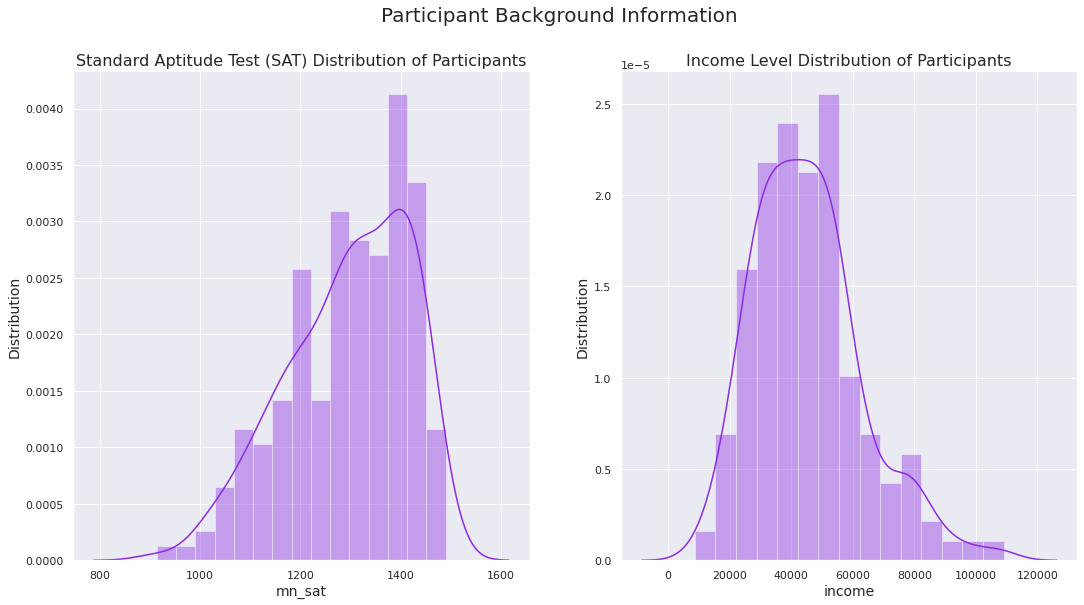

In [225]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(18,9))
sns.set(rc={ 'figure.facecolor':'ivory'})                        # Background of all plots
fig.suptitle('Participant Background Information', size=20)      # Title for both plots
axes[0].set_title('Standard Aptitude Test (SAT) Distribution of Participants', size=16)
axes[0].set_xlabel("SAT Scores", size=14)
axes[0].set_ylabel("Distribution", size=14)
sns.distplot(dsat['mn_sat'], kde=True, bins=15, color='blueviolet', ax=axes[0], kde=True)  
                                               # Second plot configure starts here
axes[1].set_xlabel("Income", size=14)
axes[1].set_ylabel("Distribution", size=14)
axes[1].set_title('Income Level Distribution of Participants', size=16)
sns.distplot(dz1['income'], kde=True, bins=15, color='blueviolet', ax=axes[1])


# **Statistics**

In [ ]:
df_unique[['attr_o', 'attr3_1', 'sinc_o', 'sinc3_1','match','like','like_o','int_corr','samerace', 'mn_sat', 'income']].describe()

# **Attributes Statistics**

In [226]:
attributes_gender = df_unique[['gender','attr3_1', 'attr_o','sinc3_1','sinc_o','intel3_1','intel_o','fun3_1','fun_o']].groupby('gender').mean()
cols = ['attractive_self_score', 'attractive_partner_score','sincere_self_score','sincere_partner_score','intelligent_self_score','intelligent_partner_score','fun_self_score','fun_partner_score']
attributes_gender.columns= cols

In [14]:
attributes_gender.head()

,attractive_self_score,attractive_partner_score,sincere_self_score,sincere_partner_score,intelligent_self_score,intelligent_partner_score,fun_self_score,fun_partner_score
gender,,,,,,,,
female,7.242537,7.112132,8.470149,8.103321,8.294776,7.979630,7.899254,7.133829
male,6.945255,5.461255,8.105839,6.957364,8.474453,7.382463,7.507299,6.202247


# **Attributes vs Positive Response Rates - 4 plots**

In [246]:
def hue_regplot(data, x, y, hue, palette=None, **kwargs):     # This function allows lmplot to accept the 'hue' parameter
    from matplotlib.cm import get_cmap
    
    regplots = []
    
    levels = data[hue].unique()
    
    if palette is None:
        default_colors = get_cmap('tab10')
        palette = {k: default_colors(i) for i, k in enumerate(levels)}
    
    for key in levels:
        regplots.append(
            sns.regplot(
                x=x,
                y=y,
                data=data[data[hue] == key],
                color=palette[key],
                **kwargs
            )
        )
    
    return regplots

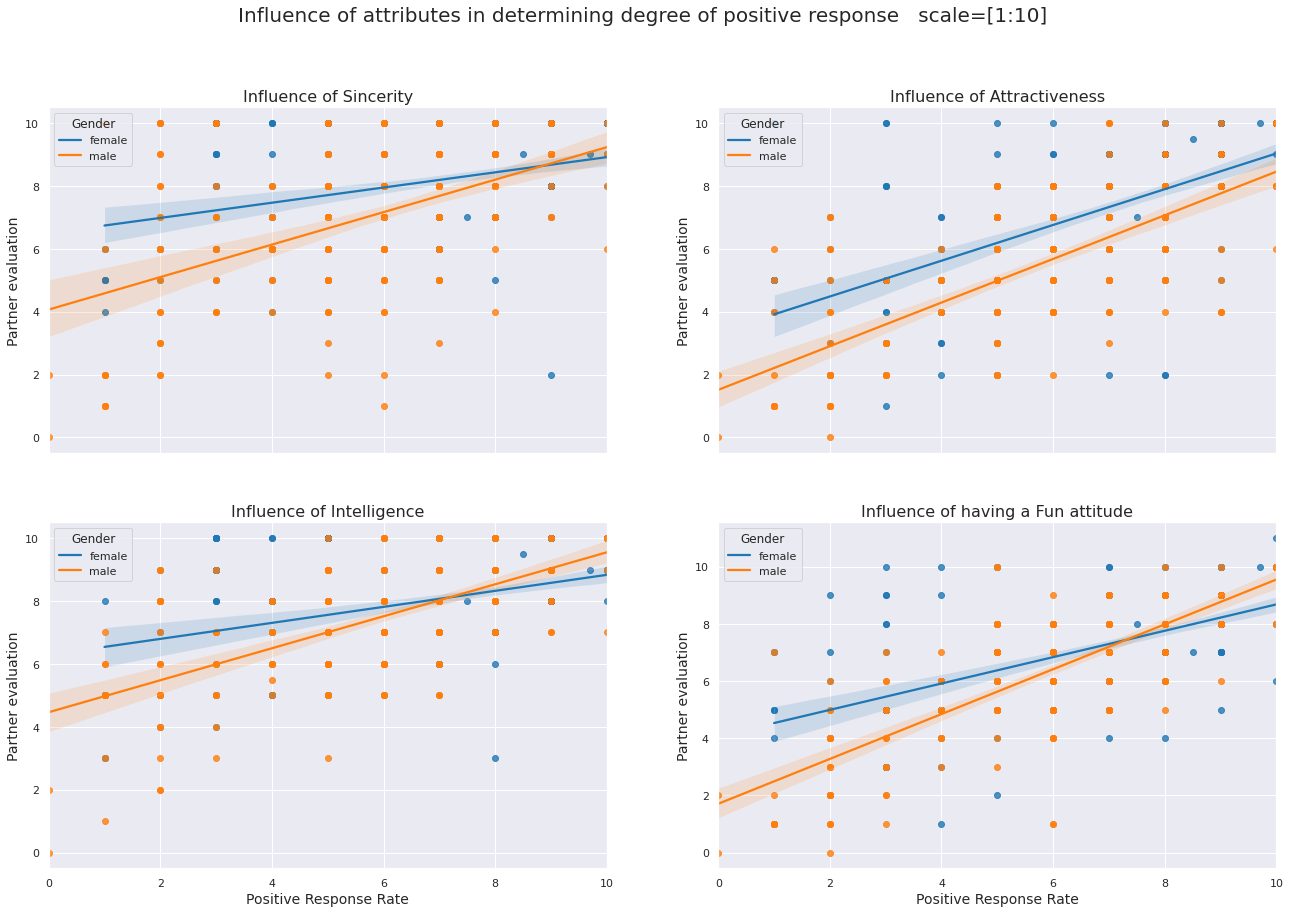

In [279]:
######  This section relies on the function " regplot "  being run first.  Regplot also lmplot to accept 'hue' parameters   ##########

fig, axes = plt.subplots(2, 2, sharex=True, figsize=(22,14))
# sns.set(rc={ 'figure.facecolor':'ivory'})                        # Background of all plots
fig.suptitle('Influence of attributes in determining degree of positive response   scale=[1:10]', size=20)      # Title for both plots
axes[0][0].set_title('Influence of Sincerity', size=16)
hue_regplot(data=df_unique, x='like_o', y='sinc_o', hue='gender', ax=axes[0][0] )  
axes[0][0].set_xlabel("", size=14)  
axes[0][0].set_ylabel("Partner evaluation", size=14)
axes[0][0].legend(title='Gender', loc='upper left', labels=['female', 'male'])
                                                                       # Second plot configure starts here
axes[0][1].set_title('Influence of Attractiveness', size=16)
hue_regplot(data=df_unique, x='like_o', y='attr_o', hue='gender', ax=axes[0][1] )  
axes[0][1].set_xlabel("", size=14)
axes[0][1].set_ylabel("Partner evaluation", size=14)
axes[0][1].legend(title='Gender', loc='upper left', labels=['female', 'male'])
                                                                       # Third plot configure starts here
axes[1][0].set_title('Influence of Intelligence', size=16)
hue_regplot(data=df_unique, x='like_o', y='intel_o', hue='gender', ax=axes[1][0] )  
axes[1][0].set_xlabel("Positive Response Rate", size=14)
axes[1][0].set_ylabel("Partner evaluation", size=14)
axes[1][0].legend(title='Gender', loc='upper left', labels=['female', 'male'])
                                                                      # Fourth plot configure starts here
axes[1][1].set_title('Influence of having a Fun attitude', size=16)
hue_regplot(data=df_unique, x='like_o', y='fun_o', hue='gender', ax=axes[1][1] )  
axes[1][1].set_xlabel("Positive Response Rate", size=14)
axes[1][1].set_ylabel("Partner evaluation", size=14)
axes[1][1].legend(title='Gender', loc='upper left', labels=['female', 'male'])

# Compilation of what people like to do - 1 plot

In [20]:
df_activity = df_unique[['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga', 'gender','race']]
df_activity.head()

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,gender,race
0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,female,asian
10,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,female,white
20,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,female,white
30,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,female,white
40,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,female,white


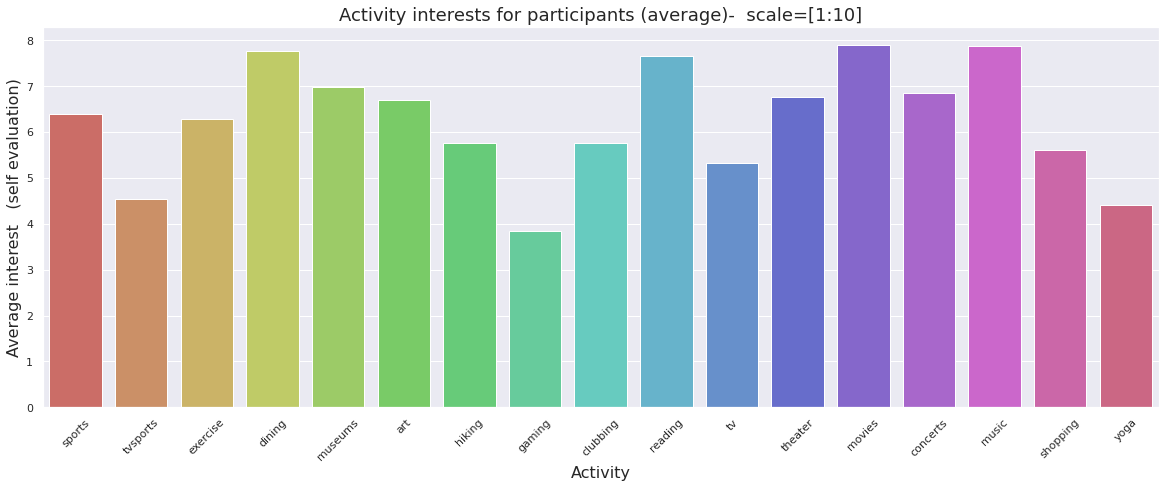

In [236]:
sns.set()

fig, axes = plt.subplots(figsize=(20,7))
fig = sns.barplot(x = df_activity.mean().index, 
                  y = df_activity.mean(),
                  # hue = 'gender',
                  ax=axes,
                  palette = 'hls',
                  capsize = 0.05       
                  )
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
axes.set_xlabel("Activity", size=16)
axes.set_ylabel("Average interest   (self evaluation)", size=16)
axes.set_title('Activity interests for participants (average)-  scale=[1:10]', size=18)
plt.show()

# **Decision (matches) by gender and race - 2 plots**

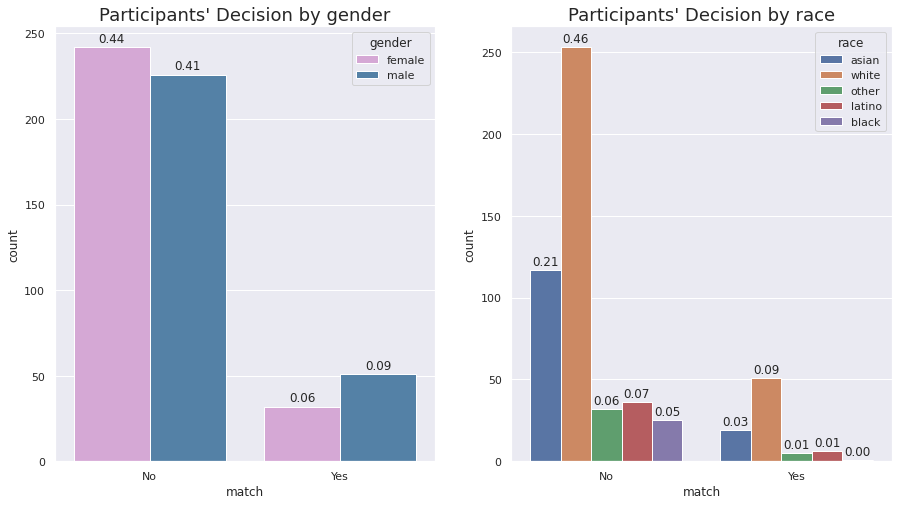

In [22]:
df2 = df_unique
total = float(len(df2))
df2 = df2.replace({'match': mapping2, 'match': mapping2})    # replace 0/1 binary in column to no/yes
df2 = df2.replace({'gender': mapping1, 'gender': mapping1})  # replace 0/1 binary in column to female/male
df2 = df2.replace({'race': mapping, 'race': mapping})        # replace numbers in column to match race name
# df2['match'] = df2['match'].map({True: 'Yes', False: 'No'})
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=[15,8])
g = sns.countplot(data=df2, 
              hue ="gender", 
              x="match", 
              palette=['plum', 'steelblue'],
              ax=ax1)
g.set_title("Participants' Decision by gender", fontsize=18)   # 1=YES, 0=NO, 'dec'=decide, 'match'=matchax0 
for p in g.patches:                        # code here calculates percentages and placement on the plot
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

g1 = sns.countplot(data=df2, 
              x="match",
              hue ="race", 
              ax=ax2)
g1.set_title("Participants' Decision by race", fontsize=18)   # 1=YES, 0=NO, 'dec'=decide, 'match'=matchax0 
for p in g1.patches:                        # code here calculates percentages and placement on the plot
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

# **Heat Map - 1 plot**

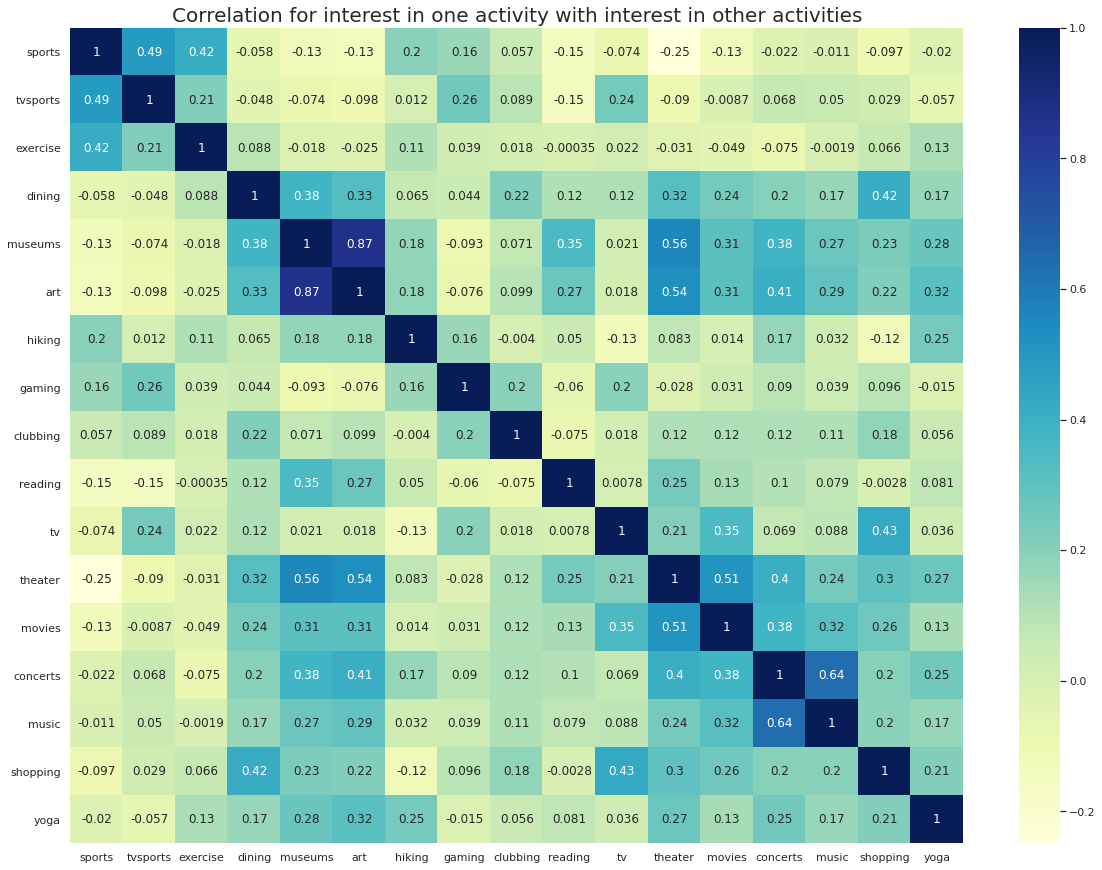

In [23]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation for interest in one activity with interest in other activities", size =20)
corr = df_activity.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='YlGnBu',
            annot=True)